<a href="https://colab.research.google.com/github/chamathjh/monte_carlo_simulation/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo Simulation on Portfolio Performance

---


Monte Carlo simulations are a powerful technique used in stock data prediction to estimate the range of possible outcomes and assess the associated risks. They are based on repeated random sampling and statistical modeling to simulate a large number of possible scenarios.

In the context of stock data prediction, Monte Carlo simulations can help investors and analysts understand the potential future behavior of stock prices, portfolio values, or other relevant financial metrics. By incorporating various assumptions and parameters, these simulations generate a distribution of possible outcomes, allowing users to assess the probability of different scenarios.

##Loading libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

##Setting the Model Environment

In [ ]:
#Retrieving Data and calculating mean return and the covariance matrix
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start, end)
    stock_data = stock_data["Adj Close"]
    returns = stock_data.pct_change()
    mean_return = returns.mean()
    cov_matrix = returns.cov()
    return mean_return, cov_matrix

stock_list = ['SBB-B', 'TELIA', 'EMBRAC-B', 'SHB-A', 'SSAB-B']
stocks = [stock + '.ST' for stock in stock_list]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=252)

mean_return, cov_matrix = get_data(stocks, start_date, end_date)

print('The mean returns for the given stocks\n')
print(mean_return)
print('-'*80)
print('The covariance matrix\n')
print(cov_matrix)

#Defining the weights of the portfolio
weights= np.random.random(len(mean_return))
weights /= np.sum(weights)

print('-'*80)
print('Allocation of the stocks:',weights)

[*********************100%***********************]  5 of 5 completed
The mean returns for the given stocks

EMBRAC-B.ST   -0.002823
SBB-B.ST      -0.002146
SHB-A.ST       0.000074
SSAB-B.ST      0.003462
TELIA.ST      -0.001246
dtype: float64
--------------------------------------------------------------------------------
The covariance matrix

             EMBRAC-B.ST  SBB-B.ST  SHB-A.ST  SSAB-B.ST  TELIA.ST
EMBRAC-B.ST     0.003164  0.000622  0.000052   0.000168  0.000112
SBB-B.ST        0.000622  0.005213  0.000188   0.000391  0.000238
SHB-A.ST        0.000052  0.000188  0.000282   0.000085 -0.000003
SSAB-B.ST       0.000168  0.000391  0.000085   0.000489  0.000033
TELIA.ST        0.000112  0.000238 -0.000003   0.000033  0.000250
--------------------------------------------------------------------------------
Allocation of the stocks: [0.01163943 0.34021816 0.22465954 0.16058584 0.26289704]


##Monte Carlo Simulation

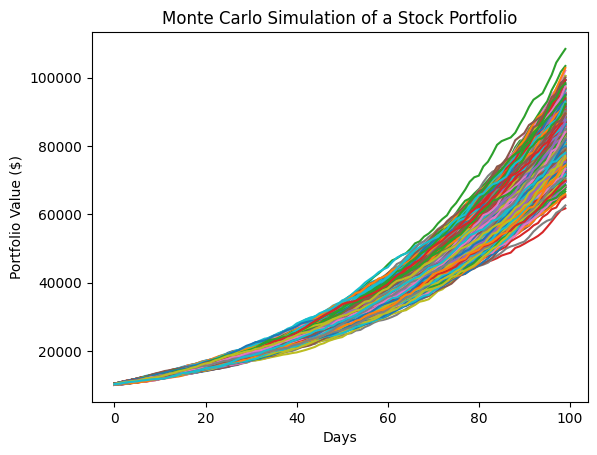

In [ ]:
mc_sims = 1000 #Number of simuations
T = 100 #Number of days
initial_port = 10000

#Defining empty lists to store simulated data
mean_matrix =   np.full(shape=(T, len(weights)), fill_value=mean_return)
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

#Taking the transpose of mean returns matrix
mean_matrix= mean_matrix.T

#Monte Carlo simulation
for n in range(0,mc_sims):
  z= np.random.random(size=(T, len(weights)))
  l= np.linalg.cholesky(cov_matrix)
  daily_returns= mean_matrix + np.inner(l,z)
  portfolio_sims[:,n]= np.cumprod(np.inner(weights, daily_returns.T)+1)*initial_port

#Plotting the simulation
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of a Stock Portfolio')
plt.show()


* The Monte Carlo simulation begins with a loop that runs *mc_sims* times.
* For each iteration, random numbers *z* are generated with the shape *(T, len(weights))*. These numbers represent the random factors used in the simulation.
* The Cholesky decomposition of the *cov_matrix* is calculated and stored in *l*. This decomposition is used to correlate the random factors and generate daily returns.
* Daily returns are calculated by adding the *mean_matrix* to the matrix multiplication of *l* and *z*. This represents the change in asset values for each day in the simulation.
* The portfolio simulation for each iteration is calculated by taking the dot product of *weights* and the transposed *daily_returns*, adding 1 to each element, taking the cumulative product, and multiplying by the *initial_port* value. This represents the simulated portfolio value for each day.


---



Almost all the assets in the portfolio are positively correlated, it means they tend to move in the same direction. In a positive market environment, this positive correlation can amplify the returns, leading to an increasing trend in the portfolio values.

Although the simulations show that the portfolio value increases over time at an increasing rate(positive convex), they don't guarantee the same outcome in real-world scenarios. Market conditions, asset performance, and other factors can significantly influence the actual behavior of a stock portfolio. Monte Carlo simulations are used to provide a range of possible outcomes based on assumptions, but they should be interpreted with caution and not taken as accurate predictions.
